In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from src.utils.globals import *


In [17]:
from IPython.display import clear_output
import pandas as pd
import time

# Define columns for each method
models = {"z" : 0, "mz" : 1, "lof" : 2, "if" : 3}
methods = models.keys()

# Initial progress values and total tasks for each method
total_task = 10 # total tasks for each method

# Create a DataFrame with the methods as columns
df = pd.DataFrame({method: [f"0/{total_task}"] for method in methods})

#print(int(df.at[0, 'z'].split('/')[0]) + 1 )

# Function to update progress in the DataFrame
def update_progress(df, methods):
    for i, method in enumerate(methods):
        df.at[0, method] = f"{int(df.at[0, method].split('/')[0]) + 1}/{total_task}"
    return df

# Simulate updating progress
for i in range(1, total_task+1):   
    # Update DataFrame with new progress
    df = update_progress(df, methods)
    
    # Clear output and display the updated DataFrame without the index
    clear_output(wait=True)
    print(df.to_string(index=False))
    
    # Pause for demonstration
    time.sleep(0.5)


   z   mz  lof   if
9/10 9/10 9/10 9/10


In [36]:
path_tracks = "data/tracks/tracks_results.parquet"
path_series = "data/tracks/tracks_series_results.parquet"

df_tracks = pd.read_parquet(path_tracks)
df_series = pd.read_parquet(path_series)

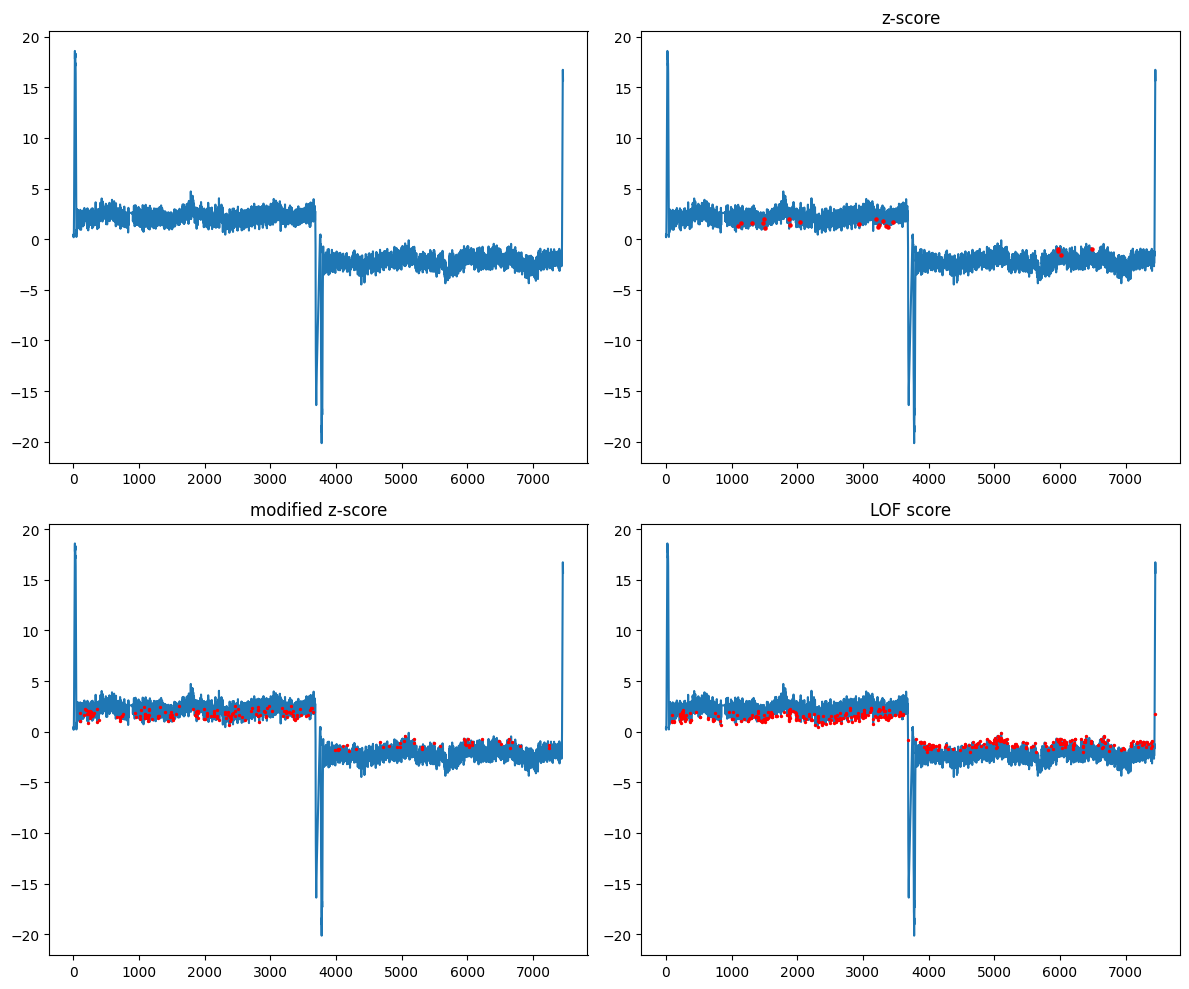

In [42]:
seqid = "6640-102788-1|2020-10-20|08:39:18"

df_seq = df_tracks[df_tracks['seqid'] == seqid]
df_z = df_seq.loc[abs(df_seq['zscore']) >= threshold_z]
df_mz = df_seq.loc[abs(df_seq['mzscore']) >= threshold_mz]
df_lof = df_seq.loc[df_seq['lof_score'] >= threshold_lof]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0,0].plot(df_seq['timeindex_bin'], df_seq['torqueactual'], label='Torque Actual')

axs[0,1].plot(df_seq['timeindex_bin'], df_seq['torqueactual'], label='Torque Actual', zorder=1)
axs[0,1].scatter(df_z['timeindex_bin'], df_z['torqueactual'], color='red', s=5, label='high z scores', zorder=2)
axs[0,1].set_title("z-score")

axs[1,0].plot(df_seq['timeindex_bin'], df_seq['torqueactual'], label='Torque Actual', zorder=1)
axs[1,0].scatter(df_mz['timeindex_bin'], df_mz['torqueactual'], color='red', s=2, label='high mz scores', zorder=2)
axs[1,0].set_title("modified z-score")

axs[1,1].plot(df_seq['timeindex_bin'], df_seq['torqueactual'], label='Torque Actual')
axs[1,1].scatter(df_lof['timeindex_bin'], df_lof['torqueactual'], color='red', s=2, label='high mz scores', zorder=2)
axs[1,1].set_title("LOF score")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()